In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./temperatures_anomalies.csv")

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.head(5000)

,AnomalyScore,Region,Country,State,City,Month,Day,Year,AvgTemperature,MAD_Total,Tukey_Total,AnomalyLabel,Date
0,1.000000,North America,US,Wisconsin,Green Bay,8,28,2007,-99.0,1,1,1,2007-08-28
1,0.998204,North America,US,Wyoming,Cheyenne,8,28,2007,-99.0,1,1,1,2007-08-28
2,0.996580,North America,US,Wisconsin,Green Bay,2,12,2008,-99.0,1,1,1,2008-02-12
3,0.994791,North America,US,Wyoming,Cheyenne,2,12,2008,-99.0,1,1,1,2008-02-12
4,0.993965,North America,US,Wisconsin,Green Bay,9,24,2008,-99.0,1,1,1,2008-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.425151,North America,US,Minnesota,Duluth,3,2,2011,-0.4,0,1,1,2011-03-02
4996,0.424986,North America,US,Minnesota,Duluth,1,9,2009,-0.4,0,1,1,2009-01-09
4997,0.424980,North America,US,Minnesota,Duluth,3,7,2008,-3.5,0,1,1,2008-03-07
4998,0.424919,North America,US,Minnesota,Duluth,1,18,2012,-3.1,0,1,1,2012-01-18


<Axes: >

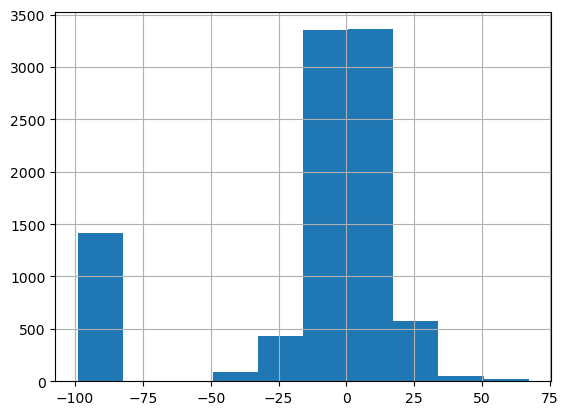

In [2]:
df[df["AnomalyLabel"] == 1]["AvgTemperature"].hist()

C:\Users\Joerg\AppData\Local\Temp\ipykernel_21556\2071607762.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Joerg\AppData\Local\Temp\ipykernel_21556\2071607762.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("./images/example.png", dpi=300)
c:\Users\Joerg\anaconda3\envs\dl_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


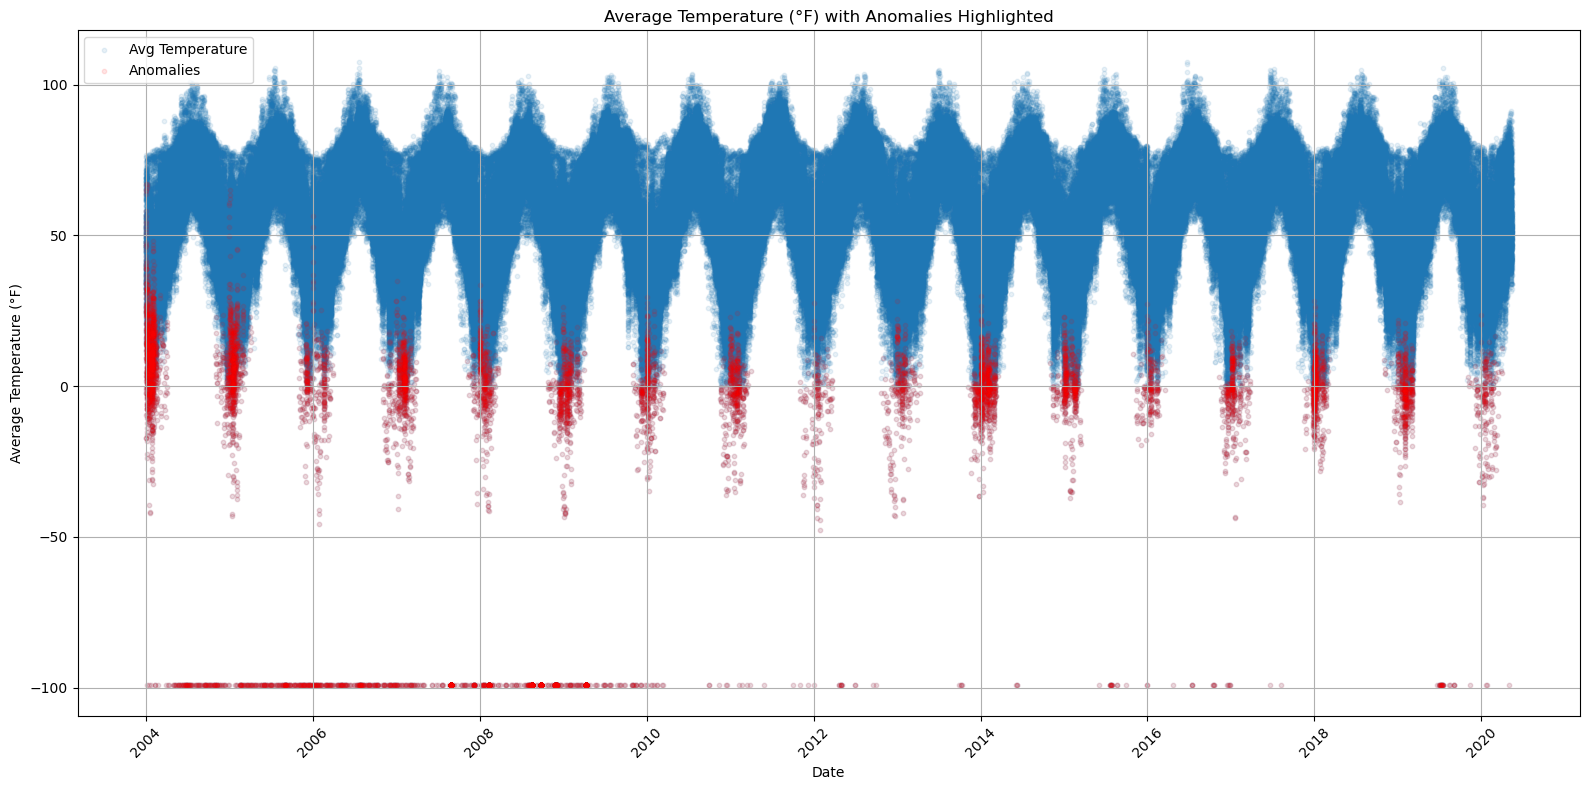

In [3]:
# Combine Year, Month, Day into a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Plotting
plt.figure(figsize=(16, 8))
plt.scatter(df['Date'], df['AvgTemperature'], label='Avg Temperature', marker='o', s=10, alpha=0.1)

# Highlight anomalies
anomalies = df[df['AnomalyLabel'] == 1]
plt.scatter(anomalies['Date'], anomalies['AvgTemperature'], color='red', label='Anomalies', s=10, alpha=0.1)

plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.title('Average Temperature (°F) with Anomalies Highlighted')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("./images/example.png", dpi=300)

plt.show()